In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('C:\\Users\\r.hakimov\\Documents\\GitHub\\ReinforcementLearning'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from Models.A2C import A2C
from CustomEnvironments.DimensionWalk import DimensionWalk
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from Utils import encode_actions
NUM_EPOCHS = 5000

Using TensorFlow backend.


In [7]:
def run_training(env, model, action_array):
    actor_losses = []
    critic_losses = []
    total_rewards = []
    for i_episode in range(NUM_EPOCHS):
        if i_episode % 100 == 1:
            print(str(i_episode) + ' Total Reward = ' + str(total_rewards[-1]))
        states, actions, rewards, next_states, dones = [], [], [], [], []
        observation = env.reset()
        done = False
        k = 0
        total_reward = 0
        while done == False:

            k = k + 1
            action = model.predict_action(np.array([observation]))
            states.append(observation)
            observation, reward, done, info = env.step(action_array[action])
            if (i_episode==NUM_EPOCHS-1):
                print(env.game_map)
            if (k > 100):
                done = True

            next_states.append(observation)
            actions.append(action)
            rewards.append(reward)
            dones.append(done)
            total_reward += reward
        actor_loss, critic_loss = model.train(states, actions, rewards, next_states, dones)
        total_rewards.append(total_reward)
        actor_losses.append(actor_loss)
        critic_losses.append(critic_loss)
    return total_rewards

In [37]:
env = DimensionWalk([10,10])
encoded_actions = encode_actions([-1,-1],[1,1],[1,1])
model = A2C(env.observation_space,len(encoded_actions),[4],lr_actor=0.005,lr_critic=0.005,gamma=0.99)
a2c_total_rewards = run_training(env,model,encoded_actions)

1 Total Reward = -6.266977694568035


101 Total Reward = -6.543336879920947


201 Total Reward = -7.766706559712795


301 Total Reward = 51.810041629496844


401 Total Reward = 49.91074660633484


501 Total Reward = 51.648823529411764


601 Total Reward = 54.016917399143566


701 Total Reward = 54.62094017094017


801 Total Reward = 51.401923076923076


901 Total Reward = 57.2


1001 Total Reward = 52.13027376007207


1101 Total Reward = 50


1201 Total Reward = 51.05


1301 Total Reward = 49.50991560250195


1401 Total Reward = 50


1501 Total Reward = 50.757582582582586


1601 Total Reward = 54.176923076923075


1701 Total Reward = 51.76346153846154


1801 Total Reward = 51.77766968325792


1901 Total Reward = 52.401923076923076


2001 Total Reward = 51.5


2101 Total Reward = 51.9


2201 Total Reward = 50.401923076923076


2301 Total Reward = 50.5


2401 Total Reward = 51.29747863247863


2501 Total Reward = 50.35747863247863


2601 Total Reward = 50.4


2701 Total Reward = 51.748173076923074


2801 Total Reward = 53.50381347410759


2901 Total Reward = 50.5125


3001 Total Reward = 51.29747863247863


3101 Total Reward = 51.297285067873304


3201 Total Reward = 50.4


3301 Total Reward = 51.3


3401 Total Reward = 51.751405835543764


3501 Total Reward = 50


3601 Total Reward = 50.55384615384615


3701 Total Reward = 52.301923076923075


3801 Total Reward = 50.04392015843236


3901 Total Reward = 51.4


4001 Total Reward = 50.44722222222222


4101 Total Reward = 50.401923076923076


4201 Total Reward = 51.19355706385118


4301 Total Reward = 50.19003831417624


4401 Total Reward = 50.211405835543765


4501 Total Reward = 51.4


4601 Total Reward = 50


4701 Total Reward = 50.425


4801 Total Reward = 50.425


4901 Total Reward = 51.38640583554377


[['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 's' '=' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'f' 'o' 'o' 'o' 'o' 'o']]
[['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 's' '=' '=' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'f' 'o' 'o' 'o' 'o' 'o']]
[['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o']
 ['o' 'o'

In [23]:
def plot_running_reward(total_rewards,gamma = 0.9):    
    running_rewards = []
    running_reward = 0
    for i in range(len(total_rewards)):
        running_reward = gamma*running_reward+(1-gamma)*total_rewards[i]
        running_rewards.append(running_reward)
    plt.plot(range(0,NUM_EPOCHS),running_rewards)


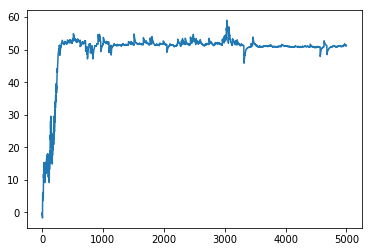

In [38]:
plot_running_reward(a2c_total_rewards,0.95)